In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/content/data.csv')

In [3]:
df.isnull().sum()

Name                      2
Age                    9999
Years of Experience       0
Salary                 9999
dtype: int64

In [4]:
df=df.dropna()

In [5]:
age_q1 = df["Age"].quantile(0.25)
age_q3 = df["Age"].quantile(0.75)

exp_q1 = df["Years of Experience"].quantile(0.25)
exp_q3 = df["Years of Experience"].quantile(0.75)

age_iqr = age_q3 - age_q1

exp_iqr = exp_q3 - exp_q1

age_lower_bound = age_q1 - 1.5 * age_iqr
age_upper_bound = age_q3 + 1.5 * age_iqr

exp_lower_bound = exp_q1 - 1.5 * exp_iqr
exp_upper_bound = exp_q3 + 1.5 * exp_iqr

df_clean = df[(df["Age"] >= age_lower_bound) & (df["Age"] <= age_upper_bound) & (df['Years of Experience'] >= exp_lower_bound) & (df['Years of Experience'] <= exp_upper_bound)]
df_clean.to_csv('cleaned_data.csv',index=False)
df_clean=pd.read_csv('/content/cleaned_data.csv')

<Axes: >

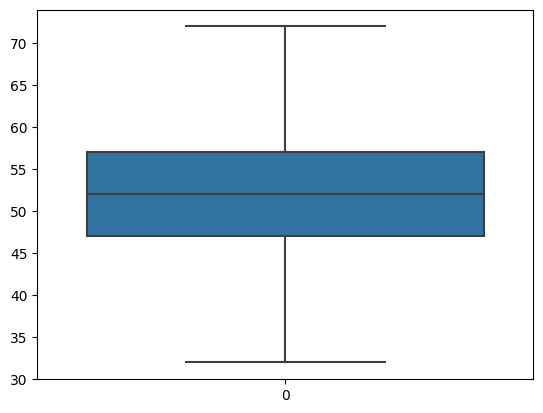

In [6]:
sns.boxplot(df_clean['Age'])

In [7]:
conditions = [
    (df_clean['Salary'] < 30000),
    (df_clean['Salary'] > 30000),
    (df_clean['Salary'] > 60000)
]

replacement_values = ['0-30000', '30001-60000', '60001+']

df_clean['Salary'] = np.select(conditions, replacement_values)


In [8]:
df_clean['Salary'].unique()

array(['0-30000', '30001-60000'], dtype=object)

In [9]:
x=df_clean.iloc[:,1:3]
y=df_clean.iloc[:,3:4]

In [10]:
y

,Salary
0,0-30000
1,0-30000
2,0-30000
3,0-30000
4,0-30000
...,...
4875,30001-60000
4876,30001-60000
4877,30001-60000
4878,30001-60000


In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=5)

In [12]:
lr=LogisticRegression()

In [13]:
lr.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
ypred=lr.predict(xtest)

In [15]:
cm = confusion_matrix(ytest, ypred)
cm

array([[  0,  10],
       [  3, 963]])

In [16]:
accuracy_score(ytest,ypred)

0.9866803278688525

In [17]:
lr.predict([[30,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['0-30000'], dtype=object)

In [18]:
pickle.dump(lr,open('hr_lr.pkl','wb'))